In [25]:
import pandas as pd
from antQuant.utils import DataManager

In [26]:
hyundai = DataManager()
hyundai_stock = hyundai.get_daily_ohlcv('005380')

In [27]:
hyundai_stock.index.get_loc('2016-01-04')

6845

In [28]:
hyundai_stock = hyundai_stock[hyundai_stock.index.get_loc('2016-01-04'):]

In [29]:
samsung = pd.read_excel('datalab_samsung.xlsx', skiprows=6)
samsungbio = pd.read_excel('datalab_samsungbio.xlsx',skiprows=6)
hynix = pd.read_excel('datalab_skhynix.xlsx',skiprows=6)
celltrion = pd.read_excel('datalab_celltrion.xlsx',skiprows=6)
hyundai = pd.read_excel('datalab_hyundai.xlsx',skiprows=6)

In [30]:
for df in [samsung, samsungbio, hynix, celltrion, hyundai]:
    df.columns = ['date', 'search']
    df.date = pd.to_datetime(df.date)

In [31]:
hyundai = hyundai.set_index('date')

In [32]:
hyundai = hyundai.shift(1)

In [33]:
all_set = pd.concat([hyundai, hyundai_stock], axis=1)

In [34]:
all_set = all_set.dropna(axis=0)

In [35]:
import math

In [36]:
log_close = []
for i in range(len(all_set.index)):
    a = math.log(all_set['close'][i])
    log_close.append(a)

In [37]:
all_set['log_close']=log_close

In [38]:
all_set['log_close_diff'] = all_set['log_close'].diff()

In [39]:
all_set = all_set[1:]

In [40]:
import matplotlib.pyplot as plt

In [41]:
all_set = pd.DataFrame(all_set)

In [42]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
x_search = all_set[['search']].values.astype(float)
std_search = stdscaler.fit_transform(x_search)

In [43]:
norm_log_close_diff = all_set[['log_close_diff']].values.astype(float)
norm_log_close_diff = stdscaler.fit_transform(norm_log_close_diff)

In [44]:
all_set['std_search'] = std_search
all_set['norm_log_close_diff'] = norm_log_close_diff

In [45]:
all_set['std_search'].plot()
all_set['norm_log_close_diff'].plot()
plt.legend(['std_search', 'norm_log_close_diff'])

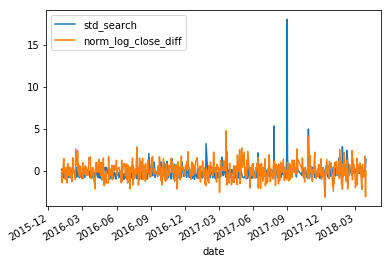

In [46]:
plt.show()

In [47]:
from scipy.stats import pearsonr
pearsonr(all_set['std_search'], all_set['norm_log_close_diff'])

(-0.06307676119572432, 0.1399338879529264)

In [48]:
all_set.corr()

,search,open,high,low,close,volume,adj_ratio,log_close,log_close_diff,std_search,norm_log_close_diff
search,1.000000,0.045656,0.047275,0.031790,0.033993,0.120973,NaN,0.033350,-0.063077,1.000000,-0.063077
open,0.045656,1.000000,0.987113,0.988982,0.972236,0.040512,NaN,0.972086,-0.080573,0.045656,-0.080573
high,0.047275,0.987113,1.000000,0.988340,0.990533,0.096128,NaN,0.989721,0.034174,0.047275,0.034174
low,0.031790,0.988982,0.988340,1.000000,0.986968,-0.001531,NaN,0.986760,0.018286,0.031790,0.018286
close,0.033993,0.972236,0.990533,0.986968,1.000000,0.062198,NaN,0.999445,0.132437,0.033993,0.132437
volume,0.120973,0.040512,0.096128,-0.001531,0.062198,1.000000,NaN,0.056801,0.066585,0.120973,0.066585
adj_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log_close,0.033350,0.972086,0.989721,0.986760,0.999445,0.056801,NaN,1.000000,0.131149,0.033350,0.131149
log_close_diff,-0.063077,-0.080573,0.034174,0.018286,0.132437,0.066585,NaN,0.131149,1.000000,-0.063077,1.000000
std_search,1.000000,0.045656,0.047275,0.031790,0.033993,0.120973,NaN,0.033350,-0.063077,1.000000,-0.063077
